In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import torch
import matplotlib.pyplot as plt
from collections import Counter

from orthogonal_dfa.l_star.examples.bernoulli_parity import BernoulliParityOracle
from orthogonal_dfa.l_star.structures import DecisionTreeLeafNode
from orthogonal_dfa.l_star.sampler import UniformSampler
from orthogonal_dfa.l_star.decision_tree_to_dfa import *
from orthogonal_dfa.utils.pdfa import batched_iterated_matrix_multiply

In [4]:
oracle = BernoulliParityOracle(0.6, 0, modulo=9, allowed_moduluses=(3, 6))

In [5]:
us = UniformSampler(40)

In [6]:
pst = PrefixSuffixTracker.create(
    us,
    np.random.default_rng(0),
    oracle,
    alphabet_size=2,
    num_prefixes=10_000,
    suffix_family_size=30,
    chi_squared_p_min=0.005,
    evidence_thresh=0.55,
    suffix_prevalence=0.05,
)
# dt = pst.extract_decision_tree()

In [7]:
fdt = abstract_interpretation_algorithm(pst, min_state_size=0.05)

Completing suffix family:   3%|3         | 1/29 [00:04<02:08,  4.61s/it]

Num states: 1; processing []


Prepending to all suffixes:  20%|##        | 6/30 [00:01<00:04,  4.96it/s]

Prepending to all suffixes:  20%|##        | 6/30 [00:01<00:04,  4.98it/s]

Num states: 2; processing [1]


Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.93it/s]

Prepending to all suffixes:  20%|##        | 6/30 [00:01<00:04,  5.05it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:  20%|##        | 6/30 [00:01<00:04,  4.97it/s]

Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.93it/s]

Num states: 4; processing [1, 1, 1]


Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.99it/s]

Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.50it/s]

Num states: 6; processing [1, 1, 1, 1]


Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.88it/s]

Prepending to all suffixes:  20%|##        | 6/30 [00:01<00:04,  4.96it/s]

Num states: 8; processing [1, 1, 1, 1, 1]


Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.74it/s]

Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.95it/s]

Num states: 9; processing [1, 1, 1, 1, 1, 1]


Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.85it/s]

Prepending to all suffixes:  17%|#6        | 5/30 [00:01<00:05,  4.90it/s]

Num states: 10; processing [1, 1, 1, 1, 1, 1, 1]
Done
Num states: 10; processing [0, 1, 1, 1, 1, 1, 1]
Done
Num states: 10; processing [0, 1, 1, 1, 1, 1]
Done
Num states: 10; processing [0, 1, 1, 1, 1]
Done
Num states: 10; processing [0, 1, 1, 1]
Done
Num states: 10; processing [0, 1, 1]
Done
Num states: 10; processing [0, 1]
Done
Num states: 10; processing [0]
Done


Best DFA has success rate on 'correct' states 0.8850


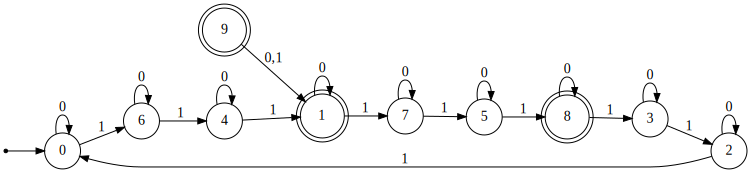

In [8]:
pst.optimal_dfa(fdt)